In [1]:
!ls data

random_paths_benchmark.csv  santa_cities.csv


In [2]:
!head data/santa_cities.csv

In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from concorde.tsp import TSPSolver

In [4]:
df = pd.read_csv("data/santa_cities.csv") # index_col="id"
df

,id,x,y
0,0,4360,6178
1,1,10906,14956
2,2,5071,8963
3,3,13853,4105
4,4,18885,3168
...,...,...,...
149995,149995,7585,1056
149996,149996,13993,1775
149997,149997,13820,16485
149998,149998,16927,595


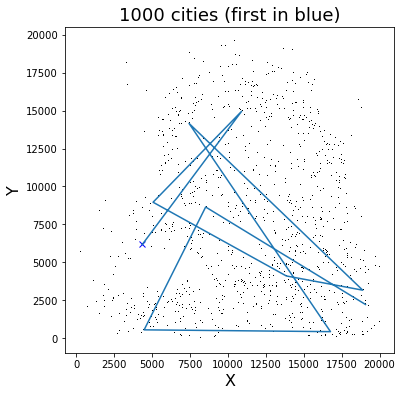

In [5]:
plt.figure(figsize=(6,6))
plt.subplot(111, adjustable='box', aspect=1.0)
plt.plot(df[:1000].x, df[:1000].y, 'k,')
plt.plot(df.x[0], df.y[0], 'bx')
plt.plot(df.x[:10], df.y[:10])
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.title('1000 cities (first in blue)', fontsize=18)
plt.show()

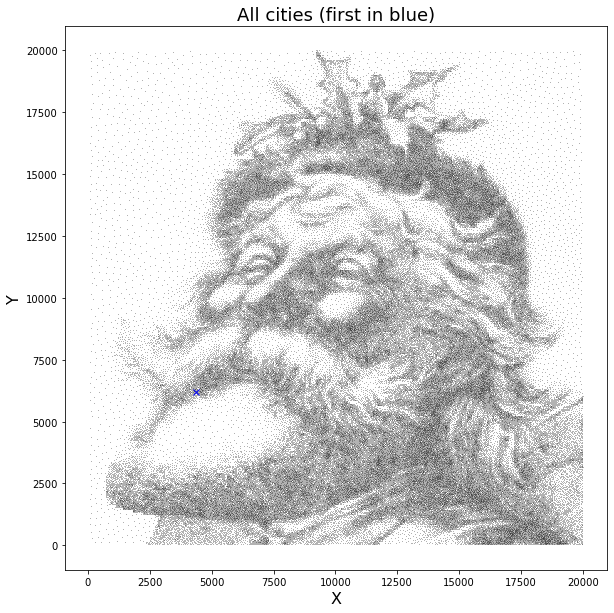

In [6]:
plt.figure(figsize=(16,10))
plt.subplot(111, adjustable='box', aspect=1.0)
plt.plot(df.x, df.y, 'k,', alpha=0.3)
plt.plot(df.x[0], df.y[0], 'bx')
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.title('All cities (first in blue)', fontsize=18)
plt.show()

In [7]:
xy = np.array([df.x.values, df.y.values]).T
xy

array([[ 4360,  6178],
       [10906, 14956],
       [ 5071,  8963],
       ...,
       [13820, 16485],
       [16927,   595],
       [ 9141, 13286]])

In [8]:
df.index.values

array([     0,      1,      2, ..., 149997, 149998, 149999])

In [9]:
myDF = df[:1000]

In [15]:
myDF

,id,x,y
0,0,4360,6178
1,1,10906,14956
2,2,5071,8963
3,3,13853,4105
4,4,18885,3168
...,...,...,...
995,995,12178,4397
996,996,8233,5272
997,997,16019,12300
998,998,12306,3327


# Greedy: Biclustering

# Greedy: Nearest Neighbour

In [10]:
def nearest_neighbour(df):
    ids = df.index.values
    xy = np.array([df.x.values, df.y.values]).T
    path = [0,]
    while len(ids) > 0:
        last_x, last_y = df.x[path[-1]], df.x[path[-1]]
        dist = ((xy - np.array([last_x, last_y]))**2).sum(-1)
        nearest_index = dist.argmin()
        path.append(ids[nearest_index])
        ids = np.delete(ids, nearest_index, axis=0)
        xy  = np.delete(xy,  nearest_index, axis=0)
    path.append(0)
    return path

In [11]:
path = nearest_neighbour(myDF)

In [12]:
df_path = pd.merge(pd.DataFrame({'id':path}), myDF, on='id', how="left")
df_path

,id,x,y
0,0,4360,6178
1,923,4680,3289
2,125,3575,5218
3,431,3089,2935
4,42,2770,2788
...,...,...,...
997,574,18160,196
998,396,18883,231
999,535,18867,209
1000,404,18286,191


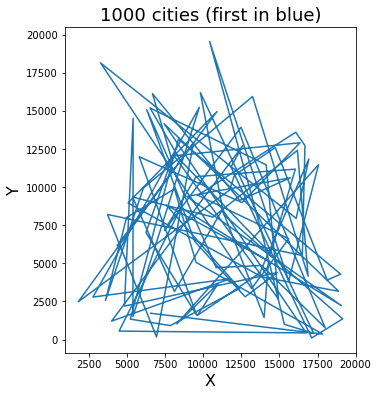

In [13]:
plt.figure(figsize=(6,6))
plt.subplot(111, adjustable='box', aspect=1.0)
plt.plot(df[:100].x, df[:100].y)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.title('1000 cities (first in blue)', fontsize=18)
plt.show()

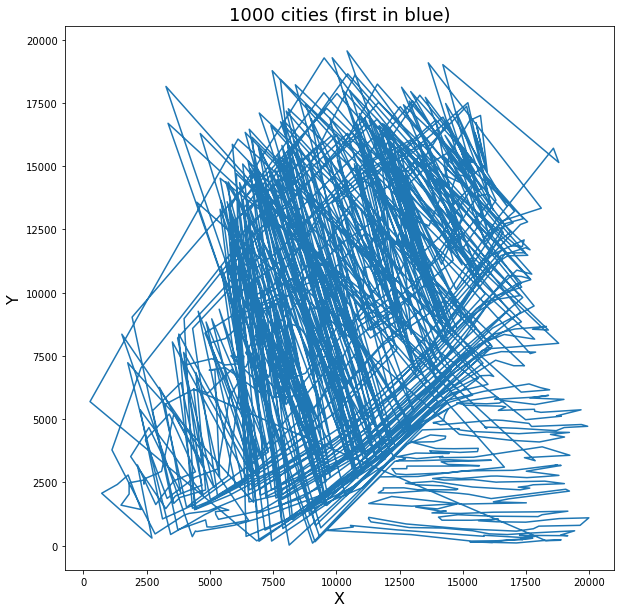

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(111, adjustable='box', aspect=1.0)
plt.plot(df_path.x, df_path.y)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.title('1000 cities (first in blue)', fontsize=18)
plt.show()